In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

C:\Users\aderi\AppData\Local\Temp\ipykernel_21708\2797174897.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# importing and turn csv files into Pandas Dataframe
filepath = (r'C:\Users\aderi\Desktop\Data\ML\Movie_dataset\ml-25m\movies.csv')
filepath2 = (r'C:\Users\aderi\Desktop\Data\ML\Movie_dataset\ml-25m\ratings.csv')
df_movies= pd.read_csv(filepath)
df_rating = pd.read_csv(filepath2)

In [4]:
# Exploring thr dataset 
# Calculate the number of unique users, movies, and total ratings
user_n = df_rating['userId'].nunique()  # Number of unique users
movie_n = df_rating['movieId'].nunique()  # Number of unique movies
rating_n = len(df_rating)  # Total number of ratings

# Print the number of total ratings, unique movies, and unique users
print(f'Number of ratings: {rating_n}')
print(f'Number of unique movies: {movie_n}')
print(f'Number of unique users: {user_n}')

# Calculate and print the average number of ratings per user and per movie
print(f'Average number of ratings per user: {round(rating_n / user_n)}')
print(f'Average number of ratings per movie: {round(rating_n / movie_n)}')


Number of ratings:25000095
Number of ratings:59047
Number of ratings:162541
Average number of ratings per user:154
Average number of ratings per movie:423


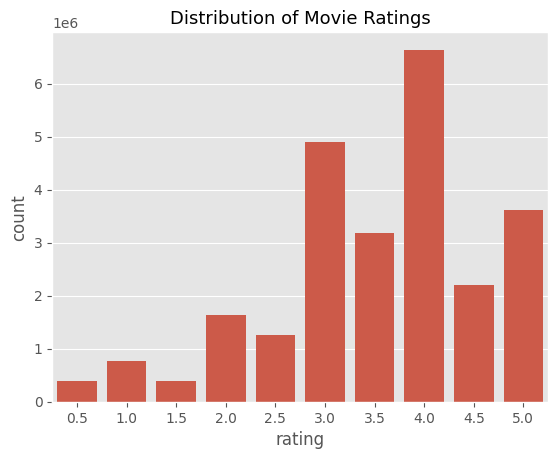

In [5]:
# Plot for distribution of movie ratngs
sns.countplot(x='rating', data=df_rating)
plt.title('Distribution of Movie Ratings', fontsize =13)
plt.show()

In [161]:
# Average rating across the movie
print(f"Mean global rating: {round(df_rating['rating'].mean(), 2)}.")

Mean global rating: 3.53.


In [7]:
# Average rating giving by user for movies
mean_rating = df_rating.groupby('userId')['rating'].mean()
print(f'Mean rating per user: {round(mean_rating.mean(), 2)}.')

Mean rating per user: 3.68.


In [8]:
# Movies Frequently rated
movie_rating= pd.merge(df_movies, df_rating, on='movieId')
movie_rating['title'].value_counts()[0:10]

title
Forrest Gump (1994)                          81491
Shawshank Redemption, The (1994)             81482
Pulp Fiction (1994)                          79672
Silence of the Lambs, The (1991)             74127
Matrix, The (1999)                           72674
Star Wars: Episode IV - A New Hope (1977)    68717
Jurassic Park (1993)                         64144
Schindler's List (1993)                      60411
Braveheart (1995)                            59184
Fight Club (1999)                            58773
Name: count, dtype: int64

In [9]:
# Lowest and Highest movie rating
mean_rating = df_rating.groupby('movieId')[['rating']].mean()
lowest_rated = mean_rating['rating'].idxmin()
df_movies[df_movies['movieId']==lowest_rated]


movieId            title genres
5693     5805  Besotted (2001)  Drama

In [10]:
highest_rated = mean_rating['rating'].idxmax()
df_movies[df_movies['movieId']==highest_rated]

movieId                                              title       genres
9416    27914  Hijacking Catastrophe: 9/11, Fear & the Sellin...  Documentary

In [11]:
# using df_rating to validate the result 
df_rating[df_rating['movieId']==highest_rated]

userId  movieId  rating   timestamp
19328266  125475    27914     5.0  1409649085

In [12]:
## Calculate statistics for each movie, including count of ratings and average rating
movie_stat = movie_rating.groupby('movieId')['rating'].agg(['count', 'mean'])

# Display the first 2 rows of the movie statistics DataFrame
movie_stat.head(2)


count      mean
movieId                 
1        57309  3.893708
2        24228  3.251527

In [13]:
# Calculate the average number of ratings for a given movie (C) and the mean of ratings across all movies (m)
C = movie_stat['count'].mean()  # Average number of ratings for a given movie
m = movie_stat['mean'].mean()   # Mean of ratings across all movies

# Display the calculated values
print(f"Average number of ratings for a given movie: {round(C, 2)}")
print(f"Mean of ratings across all movies: {round(m, 2)}")

Average number of rating for a given movie: 423.39
Mean of rating across all movie: 3.07


In [14]:
def Bayesian_avg(df_rating):
    # Calculate Bayesian average using the formula:
    # (C * m + sum of ratings) / (C + total number of ratings)
    bayesian_avg = (C * m + df_rating.sum()) / (C + df_rating.count())
    
    # Return the Bayesian average rounded to 3 decimal places
    return round(bayesian_avg, 3)


In [15]:
lamerica =pd.Series([5,5])
Bayesian_avg(lamerica)

3.08

In [165]:
bayesian_avg_rating = df_rating.groupby('movieId')['rating'].agg(Bayesian_avg).reset_index()
bayesian_avg_rating.columns=['movieId', 'Bayesian_avg']
movie_stat = movie_stat.merge(bayesian_avg_rating, on='movieId')
# bayesian_avg_rating
movie_stat

In [171]:
# Merge the 'movie_stat' DataFrame with the 'df_movies' DataFrame to include movie titles
movie_stat = movie_stat.merge(df_movies[['movieId', 'title']], on='movieId')

# Sort the DataFrame by movie title for better readability
movie_stat_sorted = movie_stat.sort_values(by='title')

# The resulting 'movie_stat_sorted' DataFrame now includes movie titles and is sorted alphabetically by title.


MergeError: Passing 'suffixes' which cause duplicate columns {'title_x'} is not allowed.

In [22]:
movie_stat.sort_values('Bayesian_avg', ascending=False).head()

movieId  count      mean  Bayesian_avg                             title
314       318  81482  4.413576         4.407  Shawshank Redemption, The (1994)
840       858  52498  4.324336         4.314             Godfather, The (1972)
49         50  55366  4.284353         4.275        Usual Suspects, The (1995)
1190     1221  34188  4.261759         4.247    Godfather: Part II, The (1974)
522       527  60411  4.247579         4.239           Schindler's List (1993)

In [ ]:
# Movie Genres
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.split ('|'))

In [172]:
# Import the Counter class from the collections module
from collections import Counter

# Count the frequency of each genre in the 'genres' column of the 'df_movies' DataFrame
genre_frequency = Counter(g for genres in df_movies['genres'] for g in genres)

# Print the total number of unique genres
print(f'There are {len(genre_frequency)} genres')

# Display the frequency of each genre
genre_frequency


There are 20 genres


Counter({'Drama': 25606,
         'Comedy': 16870,
         'Thriller': 8654,
         'Romance': 7719,
         'Action': 7348,
         'Horror': 5989,
         'Documentary': 5605,
         'Crime': 5319,
         '(no genres listed)': 5062,
         'Adventure': 4145,
         'Sci-Fi': 3595,
         'Children': 2935,
         'Animation': 2929,
         'Mystery': 2925,
         'Fantasy': 2731,
         'War': 1874,
         'Western': 1399,
         'Musical': 1054,
         'Film-Noir': 353,
         'IMAX': 195})

In [173]:
# Create a DataFrame from the genre_frequency dictionary, transpose it, and reset the index
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()

# Rename the columns for clarity
genre_frequency_df.columns = ['genre', 'count']

# Display the first few rows of the DataFrame
genre_frequency_df.head()

genre  count
0  Adventure   4145
1  Animation   2929
2   Children   2935
3     Comedy  16870
4    Fantasy   2731

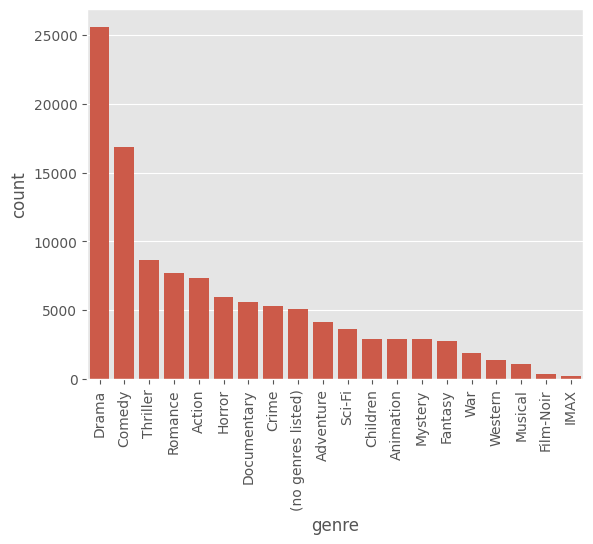

In [174]:
# Create a bar plot using seaborn
sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [175]:
# Import required libraries
from scipy.sparse import csr_matrix

# Define a function to create a sparse matrix from the rating dataframe
def create_X(df):
    """
    Generate a sparse matrix from rating dataframe

    Args:
    df: Pandas DataFrame containing 3 columns (userId, movieId, rating)

    Returns:
    X: Sparse matrix 
    user_mapper: Dictionary that maps user IDs to user indices
    user_inv_mapper: Dictionary that maps user indices to user IDs
    movie_mapper: Dictionary that maps movie IDs to movie indices
    movie_inv_mapper: Dictionary that maps movie indices to movie IDs
    """
    # Get the number of unique users and movies
    M = df['userId'].nunique()
    N = df['movieId'].nunique()
    
    # Create dictionaries to map user IDs and movie IDs to indices, and vice versa
    user_mapper = dict(zip(np.unique(df['userId']), list(range(M))))
    movie_mapper = dict(zip(np.unique(df['movieId']), list(range(N))))
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df['userId'])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df['movieId'])))
    
    # Map user and movie IDs to their respective indices
    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]
    
    # Create a sparse matrix using CSR format
    X = csr_matrix((df['rating'], (user_index, movie_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

# Call the create_X function to generate the sparse matrix and related dictionaries
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(df_rating)


In [ ]:
X.shape

In [176]:
# Calculate the total number of elements in the matrix
n_total = X.shape[0] * X.shape[1]

# Count the number of non-zero entries (ratings) in the matrix
n_rating = X.nnz

# Calculate the sparsity of the matrix
sparsity = n_rating / n_total

# Print the sparsity percentage
print(f'Matrix sparsity: {round(sparsity * 100, 2)}%')


Matrix sparsity: 0.26%


In [180]:
# Calculate the number of non-zero ratings per user
n_rating_per_user = X.getnnz(axis=1)

# Get the total number of users
num_users = len(n_rating_per_user)
print(f'Total number of non-zero per user: {num_users}')

Total number of non-zero per user: 162541


In [181]:
# Print the maximum and minimum number of movies rated by a user
print(f'Most active user rated: {n_rating_per_user.max()} movies.')
print(f'Least active user rated: {n_rating_per_user.min()} movies.')

Most active user rated: 32202 movies.
Least active user rated: 20 movies.


In [183]:
# Calculate the number of non-zero ratings per movie
n_rating_per_movie = X.getnnz(axis=0)

# Get the total number of movies
num_movies = len(n_rating_per_movie)
print(f'Total number of non-zero rating per movie: {num_movies}')

Total number of non-zero rating per movie: 59047


In [184]:
# Print the maximum and minimum number of ratings received by a movie
print(f'Most rated movie has: {n_rating_per_movie.max()} ratings.')
print(f'Least rated movie has: {n_rating_per_movie.min()} ratings.')


Most rated movie has: 81491 ratings.
Least rated movie has: 1 ratings.


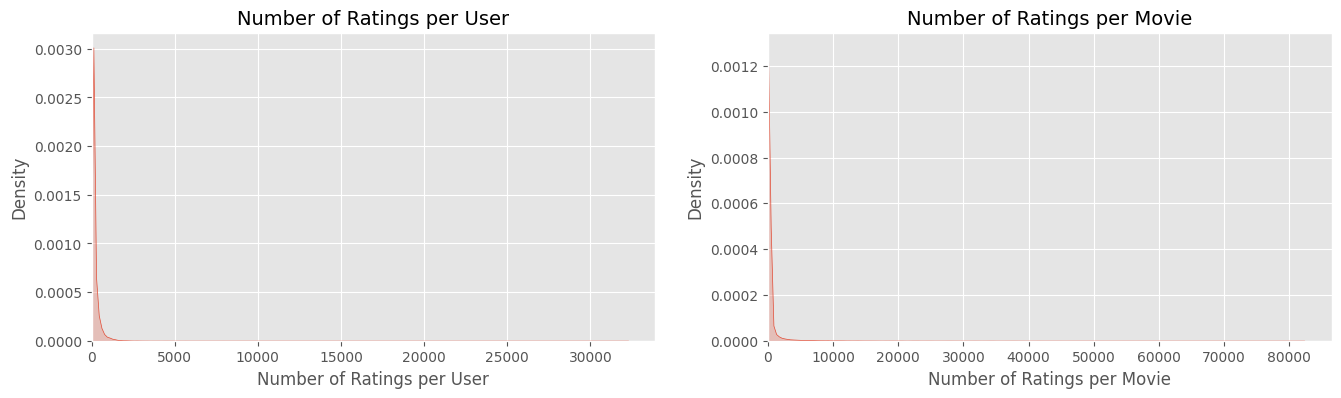

In [185]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(16, 4))

# Plot the density distribution of the number of ratings per user
plt.subplot(1, 2, 1)
sns.kdeplot(n_rating_per_user, fill=True)
plt.xlim(0)
plt.title('Number of Ratings per User', fontsize=14)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Density')

# Plot the density distribution of the number of ratings per movie
plt.subplot(1, 2, 2)
sns.kdeplot(n_rating_per_movie, fill=True)
plt.xlim(0)
plt.title('Number of Ratings per Movie', fontsize=14)
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Density')

# Show the plots
plt.show()


In [186]:
# Import required libraries
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Find k-nearest neighbors for a given movie ID.
    
    Args:
    movie_id: ID of the movie of interest.
    X: User-item utility matrix.
    movie_mapper: Dictionary mapping movie IDs to indices in the utility matrix.
    movie_inv_mapper: Dictionary mapping indices in the utility matrix to movie IDs.
    k: Number of similar movies to retrieve.
    metric: Distance metric for KNN calculations.

    Returns:
    List of k similar movie IDs.
    """
    # Transpose the utility matrix
    X = X.T
    
    # Initialize a list to store the IDs of the k nearest neighbors
    neighbour_ids = []
    
    # Get the index of the movie of interest
    movie_ind = movie_mapper[movie_id]
    
    # Get the feature vector for the movie of interest
    movie_vec = X[movie_ind]
    
    # If the feature vector is a numpy array, reshape it to 2D array
    if isinstance(movie_vec, np.ndarray):
        movie_vec = movie_vec.reshape(1, -1)
    
    # Initialize the KNN model with the specified parameters
    KNN = NearestNeighbors(n_neighbors=k+1, algorithm='brute', metric=metric)
    
    # Fit the KNN model to the transposed utility matrix
    KNN.fit(X)
    
    # Find the k+1 nearest neighbors (including the movie of interest)
    neighbour = KNN.kneighbors(movie_vec, return_distance=False).flatten()
    
    # Extract the IDs of the k nearest neighbors (excluding the movie of interest)
    for i in range(0, k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    
    # Remove the movie of interest from the list
    neighbour_ids.pop(0)
    
    return neighbour_ids


In [187]:
# Call the find_similar_movies function to find similar movies to the movie with ID 1
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)

# Print the list of similar movie IDs
print(similar_movies)


[260, 3114, 1270, 356, 480, 1210, 780, 364, 588]


In [188]:
# Create a dictionary mapping movie IDs to movie titles
movie_titles = dict(zip(df_movies['movieId'], df_movies['title']))

# Get the movie ID for which we want to find similar movies
movie_id = 1

# Find similar movies to the specified movie ID
similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k=10)

# Get the title of the specified movie
movie_title = movie_titles[movie_id]

# Print a message indicating the movie watched by the user
print(f'Because you watched {movie_title}:')

# Print the titles of similar movies
for i in similar_movies:
    print(movie_titles[i])


Because you watched Toy Story (1995):
Star Wars: Episode IV - A New Hope (1977)
Toy Story 2 (1999)
Back to the Future (1985)
Forrest Gump (1994)
Jurassic Park (1993)
Star Wars: Episode VI - Return of the Jedi (1983)
Independence Day (a.k.a. ID4) (1996)
Lion King, The (1994)
Aladdin (1992)


In [189]:
# Count the number of unique movie IDs in the movies dataset
n_movies = df_movies['movieId'].nunique()

# Print the total number of unique movies in the dataset
print(f'There are {n_movies} unique movies in our movies dataset.')

There are 62423 unique movies in our movies dataset.


In [190]:
# Extract unique genres from the 'genres' column of the df_movies DataFrame
genres = set(g for G in df_movies['genres'] for g in G)

# Iterate over each unique genre
for g in genres:
    # Create a new binary column for each genre
    # The value in each column indicates whether the movie belongs to that genre
    df_movies[g] = df_movies['genres'].transform(lambda x: int(g in x))


In [191]:
# Create a new DataFrame containing only the binary columns representing movie genres
movie_genre = df_movies.drop(columns=['movieId', 'title', 'genres'])


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim =  cosine_similarity(movie_genre, movie_genre)
print(f'Dimension of genres  cosine similarity matrix:{cosine_sim.shape}')

In [132]:
# from sklearn.neighbors import NearestNeighbors
# import numpy as np

# # Assuming movie_genre is your matrix of movie genre indicators

# # Create NearestNeighbors object
# nbrs = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='cosine')

# # Fit the model
# nbrs.fit(movie_genre)

# # Compute nearest neighbors for each movie
# distances, indices = nbrs.kneighbors(movie_genre)

# # Print the indices of nearest neighbors for each movie
# for i, neighbors in enumerate(indices):
#     print(f"Nearest neighbors for movie {i}: {neighbors}")


Nearest neighbors for movie 0: [20015 48614 43614 57586 30472 60800 55898  3021 47935 22286]
Nearest neighbors for movie 1: [55016 44838     1  9557 44316 47134 52411    59 21271 55115]
Nearest neighbors for movie 2: [24739 24735 24855 47522 24831 47527 24812  3727 24744 24862]
Nearest neighbors for movie 3: [31824 31820 31833 60670 44734 27207  6898  8780  6895 36861]
Nearest neighbors for movie 4: [54372 27360 50395 38209 30359 38206 30357 50402 57347 30358]
Nearest neighbors for movie 5: [34050 34045 17296 55966 21755  9226  5719 60818 27621 40097]
Nearest neighbors for movie 6: [24739 24735 24855 47522 24831 47527 24812  3727 24744 24862]
Nearest neighbors for movie 7: [ 3571  1484   792 38950 61197  3572 45204   810 49621 44650]
Nearest neighbors for movie 8: [45572 49272 18955 48676  6600 47306 13156 18956  4844 57744]
Nearest neighbors for movie 9: [22682   541 24290 46884 25269 11207 24938  7358  2989  2857]
Nearest neighbors for movie 10: [31824 31820 31833 60670 44734 27207  

In [192]:
# Import the process function from the fuzzywuzzy module
from fuzzywuzzy import process

# Define a function to find the closest match to the input movie title
def movie_finder(title):
    # Get a list of all movie titles
    all_titles = df_movies['title'].tolist()
    
    # Use fuzzy string matching to find the closest match to the input title
    closest_match = process.extractOne(title, all_titles)
    
    # Return the closest matching movie title
    return closest_match[0]


In [198]:
# Example
# Define the title for which the closest movie needs to be found
title = 'Juanji'

# Call the movie_finder function to find the closest match to the input title
closest_movie = movie_finder(title)

# Print the closest movie found
print(f'Closest movie found: {closest_movie}')


Closest movie found: Jumanji (1995)


In [ ]:
# Create a dictionary mapping movie titles to their corresponding indices in the DataFrame
movie_idx = dict(zip(df_movies['title'], df_movies.index))

# Get the index of the movie "Jumanji"
idx = movie_idx[title]

# Print the index of the movie "Jumanji"
print(f'Movie index for {title}: {idx}')

In [204]:
n_recommendation = 10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores =  sim_scores[1:(n_recommendations+1)]
sim_scores
similar_movies = [i[0] for i in sim_scores]
similar_movies

print(f'Because you watched {title}:')


NameError: name 'cosine_sim' is not defined

In [ ]:
def get_content_based_recommedations(title_string, n_recommendations=10):
    # Find the closest matching movie title
    title = movie_finder(title_string)
    
    # Get the index of the closest matching movie title
    idx = movie_idx[title]
    
    # Calculate cosine similarity scores between movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Extract indices of similar movies (excluding the movie itself)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    
    # Print the recommendations
    print(f'Because you watched {title}:')
    print(df_movies['title'].iloc[similar_movies])

# Example usage:
get_content_based_recommedations('Jumanji', n_recommendations=10)


In [206]:
# Dimensionality Reduction with Matrix Factorization
# Import the TruncatedSVD class from scikit-learn
from sklearn.decomposition import TruncatedSVD

# Initialize the TruncatedSVD object with desired parameters
# n_components: Number of components to keep after dimensionality reduction
# n_iter: Number of iterations for the power method
svd = TruncatedSVD(n_components=20, n_iter=10)

# Fit the TruncatedSVD model to the transposed user-item utility matrix X
# and transform it into the reduced feature space
Q = svd.fit_transform(X.T)

# Print the shape of the resulting transformed matrix Q
print(Q.shape)


(59047, 20)


In [ ]:
# def recommend_movies_nn(movie_index, indices, df_movies):
#     # Get indices of nearest neighbors for the given movie index
#     neighbor_indices = indices[movie_index][1:]  # Exclude the first index (the movie itself)
    
#     # Get titles of recommended movies
#     recommended_movies = df_movies.iloc[neighbor_indices]['title'].tolist()
    
#     return recommended_movies

# # Example usage: Recommend movies for the first movie in the dataset
# # movie_index = 0
# movie_title = "The Dark Knight"
# recommended_movies = recommend_movies_nn(movie_title, indices, df_movies)

# print("Recommended movies:")
# for movie in recommended_movies:
#     print(movie)

In [210]:
# Specify the movie ID for which you want to find similar movies
movie_id = 2000

# Find similar movies to the specified movie ID using the reduced feature space Q
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)

# Get the title of the specified movie
movie_title = movie_titles[movie_id]

# Print a message indicating the movie watched by the user
print(f'Because you watched {movie_title}:')

# Print the titles of similar movies
for i in similar_movies:
    print(movie_titles[i])


Because you watched Lethal Weapon (1987):
Lethal Weapon 2 (1989)
Rocky (1976)
Hunt for Red October, The (1990)
Die Hard 2 (1990)
Untouchables, The (1987)
Beverly Hills Cop (1984)
Superman (1978)
Crocodile Dundee (1986)
Indiana Jones and the Temple of Doom (1984)
